# Model `Panda`

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


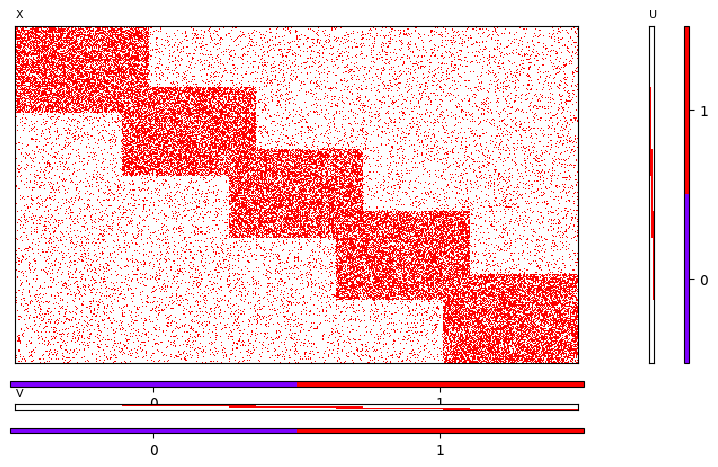

<Figure size 640x480 with 0 Axes>

In [2]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


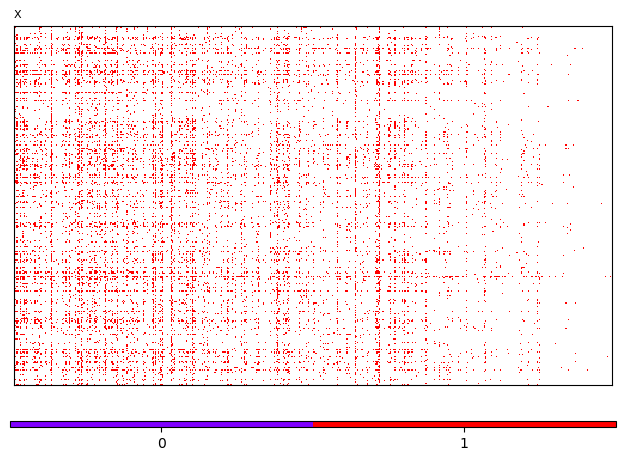

<Figure size 640x480 with 0 Axes>

In [8]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [9]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1721980472
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1721980472


# Apprximation with `k` patterns

[I] k            : 5
[I] tol          : 0
[I] w_model      : 1
[I] w_fp         : 1
[I] w_fn         : 1
[I] init_method  : couples-frequency
[I] exact_decomp : False
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] display      : True
[W] Missing testing data.
[I] name         : 2024-07-26 15-54-34-547908 Panda
[I]        [10755.0] -> [10629.0] (find_core: add col, d_cost: -126.0)
[I]        [10629.0] -> [10571.0] (find_core: add col, d_cost: -58.0)
[I]        [10571.0] -> [10518.0] (find_core: add col, d_cost: -53.0)
[I]        [10518.0] -> [10503.0] (find_core: add col, d_cost: -15.0)
[I]        [10503.0] -> [10472.0] (extend_core: add col)
[I]        [10472.0] -> [10339.0] (extend_core: add row, d_cost: -133.0, row(s) added: 61)
[I]        [10339.0] -> [10305.0] (extend_core: add col)
[I]        [10305.0] -> [10305.0] (extend_core: add row, d_cost: 0.0, row(s) added: 5)
[I]        [10305.0] -> [10262.0] (extend_core: ad

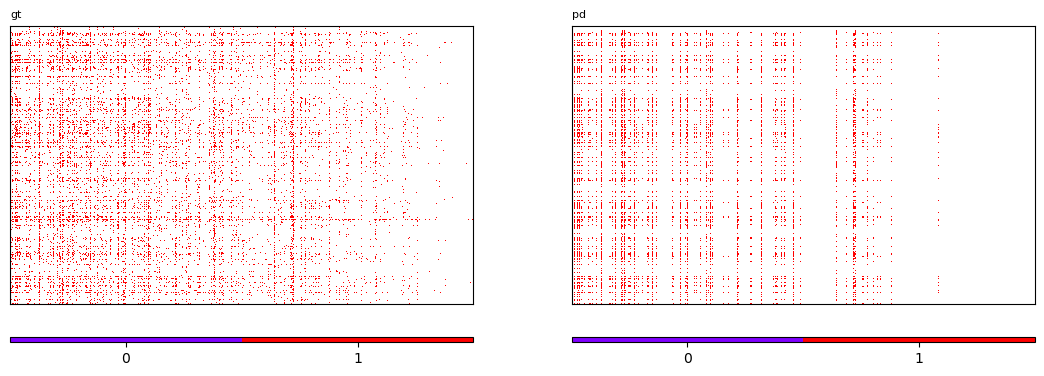

train                      \
                                                 0                       
                time     cost      shape    Recall Precision  Accuracy   
0  26/07/24 03:54:36  10031.0  [138, 21]  0.175749  0.652174  0.934187   
1  26/07/24 03:54:38   9862.0  [103, 10]  0.222336  0.660862  0.936067   
2  26/07/24 03:54:39   9670.0   [78, 18]  0.290962  0.651061  0.937987   
3  26/07/24 03:54:41   9583.0   [36, 21]  0.327599  0.646422  0.938947   
4  26/07/24 03:54:43   9512.0   [34, 11]  0.350381  0.646978  0.939720   
5  26/07/24 03:54:45   9423.0   [27, 20]  0.378464  0.646853  0.940627   

                  val                                
                    0                                
         F1    Recall Precision  Accuracy        F1  
0  0.276883  0.175749  0.652174  0.934187  0.276883  
1  0.332730  0.222336  0.660862  0.936067  0.332730  
2  0.402185  0.290962  0.651061  0.937987  0.402185  
3  0.434831  0.327599  0.646422  0.938947  0.434831  
4  0.454578  0.350381  0.646978  0.939720  0.454578  
5  0.477531  0.378464  0.646853  0.940627  0.477531

<Figure size 640x480 with 0 Axes>

In [10]:
from PyBMF.models import Panda

k = 5
w_model, w_fp, w_fn = 1, 1, 1
exact_decomp = False

model = Panda(k=k, w_model=w_model, w_fp=w_fp, w_fn=w_fn, exact_decomp=exact_decomp, init_method='couples-frequency')
model.fit(X_train=X_train, X_val=X_val, task='reconstruction', verbose=True, display=True)

# Exact decomposition with unlimited patterns

[I] k            : None
[I] tol          : 0
[I] w_model      : 1
[I] w_fp         : 1
[I] w_fn         : 1
[I] init_method  : couples-frequency
[I] exact_decomp : True
[I] verbose      : False
[I] display      : False
[I] Exact decomposition mode.
[I] task         : reconstruction
[I] verbose      : True
[I] display      : True
[I] Exact decomposition mode.
[W] Missing testing data.
[I] name         : 2024-07-26 16-00-42-401062 Panda
[I]        [10566.0] -> [10564.0] (find_core: add col, d_cost: -2.0)
[I]        [10564.0] -> [10553.0] (find_core: add col, d_cost: -11.0)
[I] k: 0 - [10754] -> [10553.0]
[I]        [10404.0] -> [10361.0] (find_core: add col, d_cost: -43.0)
[I]        [10361.0] -> [10334.0] (find_core: add col, d_cost: -27.0)
[I]        [10334.0] -> [10309.0] (find_core: add col, d_cost: -25.0)
[I] k: 1 - [10553.0] -> [10309.0]
[I] k: 2 - [10309.0] -> [10162.0]
[I]        [10033.0] -> [10026.0] (find_core: add col, d_cost: -7.0)
[I]        [10026.0] -> [10018.0] (find_cor

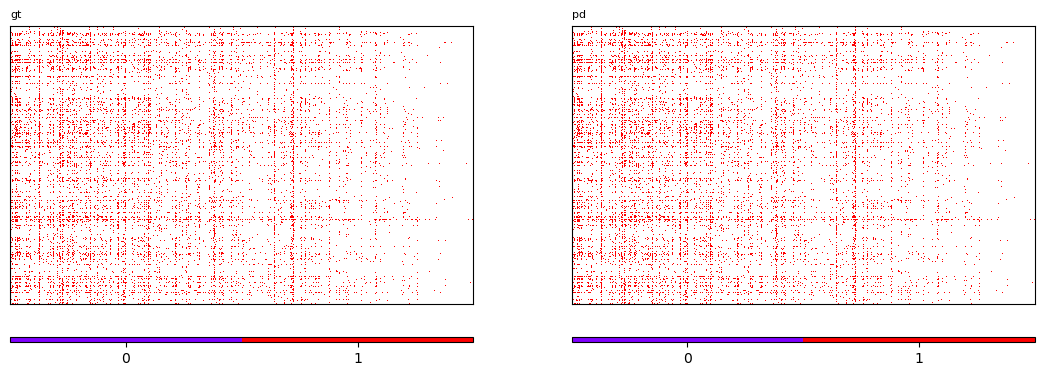

train                      \
                                                  0                       
                  time     cost     shape    Recall Precision  Accuracy   
0    26/07/24 04:00:42  10553.0   [67, 3]  0.018691       1.0  0.929647   
1    26/07/24 04:00:43  10309.0   [61, 4]  0.041380       1.0  0.931273   
2    26/07/24 04:00:44  10162.0  [147, 1]  0.055049       1.0  0.932253   
3    26/07/24 04:00:44  10018.0   [48, 3]  0.068440       1.0  0.933213   
4    26/07/24 04:00:45   9878.0   [35, 4]  0.081458       1.0  0.934147   
5    26/07/24 04:00:45   9765.0  [113, 1]  0.091966       1.0  0.934900   
6    26/07/24 04:00:46   9643.0   [61, 2]  0.103310       1.0  0.935713   
7    26/07/24 04:00:46   9495.0   [37, 4]  0.117073       1.0  0.936700   
8    26/07/24 04:00:47   9402.0   [93, 1]  0.125721       1.0  0.937320   
9    26/07/24 04:00:48   9309.0   [93, 1]  0.134369       1.0  0.937940   
10   26/07/24 04:00:48   9217.0   [92, 1]  0.142924       1.0  0.938553   
11   26/07/24 04:00:49   9085.0   [22, 6]  0.155198       1.0  0.939433   
12   26/07/24 04:00:49   8997.0   [88, 1]  0.163381       1.0  0.940020   
13   26/07/24 04:00:50   8911.0   [86, 1]  0.171378       1.0  0.940593   
14   26/07/24 04:00:51   8830.0   [81, 1]  0.178910       1.0  0.941133   
15   26/07/24 04:00:51   8722.0   [18, 6]  0.188953       1.0  0.941853   
16   26/07/24 04:00:52   8644.0   [78, 1]  0.196206       1.0  0.942373   
17   26/07/24 04:00:52   8564.0   [40, 2]  0.203645       1.0  0.942907   
18   26/07/24 04:00:53   8486.0   [39, 2]  0.210898       1.0  0.943427   
19   26/07/24 04:00:53   8399.0   [29, 3]  0.218988       1.0  0.944007   
20   26/07/24 04:00:54   8327.0   [72, 1]  0.225683       1.0  0.944487   
21   26/07/24 04:00:55   8255.0   [72, 1]  0.232379       1.0  0.944967   
22   26/07/24 04:00:55   8184.0   [71, 1]  0.238981       1.0  0.945440   
23   26/07/24 04:00:56   8114.0   [70, 1]  0.245490       1.0  0.945907   
24   26/07/24 04:00:56   8027.0   [29, 3]  0.253580       1.0  0.946487   
25   26/07/24 04:00:57   7955.0   [24, 3]  0.260275       1.0  0.946967   
26   26/07/24 04:00:58   7877.0   [39, 2]  0.267528       1.0  0.947487   
27   26/07/24 04:00:58   7813.0   [64, 1]  0.273480       1.0  0.947913   
28   26/07/24 04:00:59   7749.0   [64, 1]  0.279431       1.0  0.948340   
29   26/07/24 04:00:59   7685.0   [64, 1]  0.285382       1.0  0.948767   
30   26/07/24 04:01:00   7607.0   [39, 2]  0.292635       1.0  0.949287   
31   26/07/24 04:01:00   7544.0   [63, 1]  0.298494       1.0  0.949707   
32   26/07/24 04:01:01   7482.0   [62, 1]  0.304259       1.0  0.950120   
33   26/07/24 04:01:02   7404.0   [26, 3]  0.311512       1.0  0.950640   
34   26/07/24 04:01:02   7343.0   [61, 1]  0.317184       1.0  0.951047   
35   26/07/24 04:01:03   7283.0   [60, 1]  0.322764       1.0  0.951447   
36   26/07/24 04:01:03   7219.0   [32, 2]  0.328715       1.0  0.951873   
37   26/07/24 04:01:04   7160.0   [59, 1]  0.334201       1.0  0.952267   
38   26/07/24 04:01:05   7101.0   [59, 1]  0.339688       1.0  0.952660   
39   26/07/24 04:01:05   7041.0   [30, 2]  0.345267       1.0  0.953060   
40   26/07/24 04:01:06   6982.0   [59, 1]  0.350753       1.0  0.953453   
41   26/07/24 04:01:06   6924.0   [58, 1]  0.356147       1.0  0.953840   
42   26/07/24 04:01:07   6866.0   [29, 2]  0.361540       1.0  0.954227   
43   26/07/24 04:01:08   6809.0   [57, 1]  0.366840       1.0  0.954607   
44   26/07/24 04:01:08   6752.0   [57, 1]  0.372141       1.0  0.954987   
45   26/07/24 04:01:09   6696.0   [56, 1]  0.377348       1.0  0.955360   
46   26/07/24 04:01:09   6640.0   [56, 1]  0.382555       1.0  0.955733   
47   26/07/24 04:01:10   6580.0   [10, 6]  0.388135       1.0  0.956133   
48   26/07/24 04:01:11   6525.0   [55, 1]  0.393249       1.0  0.956500   
49   26/07/24 04:01:11   6470.0   [55, 1]  0.398363       1.0  0.956867   
50   26/07/24 04:01:12   6418.0   [52, 1]  0.403199       1.0  0.957213

<Figure size 640x480 with 0 Axes>

: 

In [12]:
from PyBMF.models import Panda

k = None
w_model, w_fp, w_fn = 1, 1, 1
exact_decomp = True

model = Panda(k=k, w_model=w_model, w_fp=w_fp, w_fn=w_fn, exact_decomp=exact_decomp, init_method='couples-frequency')
model.fit(X_train=X_train, X_val=X_val, task='reconstruction', verbose=True, display=True)